__Comparing Averages__

With old design average time spent = 3.2 minutes  

With new design, time spent = 4,2,6,3,5, average = 4

Another possible outcome, time spent = 4, 4.1, 3.9, 4.03, 3.97, average = 4

---

We have to take into account:

1. statistical dispersion (e.g. variance)

2. difference between averages

3. sample size

__One-sample Student's t-test__

$ x_1, x_2, \dots x_n $ i.i.d sample from $X \;;\; \mathbb{E}X = \mu \;;\; VarX < \infty $

$H_0:\mu = \mu_0$

Stratergy: 

1. Assume $\mu_0$ holds

2. Find theoretical distribution of $\bar{X}$

according to central limited theorem, if n is large $\bar{X} \sim \mathcal{N}(\mu_0, \frac{VarX}{n})$  
$\mathbb{E}X = \mu_0, std \bar{X} = \frac{std X}{\sqrt{n}}$


Z score = $\frac{\bar{x}-\mathbb{E}X}{std X} \cdot \sqrt{n} \sim \mathcal{N}(0,1)$

t score, $t(x) = \frac{\bar{x}-\mu_0}{std x} \cdot \sqrt{n} \sim T- distribution$

T- distribution is similar to normal distribution, but for small values of n there is some differnce.

0.0 3.7027027027027017 nan inf


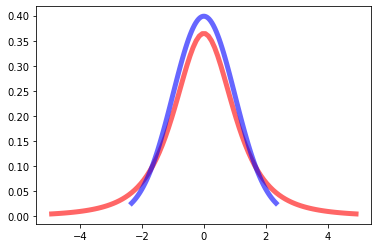

In [12]:
from scipy.stats import t, norm
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1)

df = 2.74
mean, var, skew, kurt = t.stats(df, moments='mvsk')

print(mean, var, skew, kurt)

x = np.linspace(t.ppf(0.01, df),
                t.ppf(0.99, df), 100)
ax.plot(x, t.pdf(x, df),
       'r-', lw=5, alpha=0.6, label='t pdf')

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'b-', lw=5, alpha=0.6, label='norm pdf')

$P(t(x_{obs}) > t_{critical}) < \alpha$ provided $H_0$

If $t(x_{obs}) > t_{critical} \implies $ reject $H_0$

p-value$(x_{obs}) = P(t(x)>t(x_{obs}) | H_0)$


t score, $t(x) = {\large \frac{\bar{x}-\mu_0}{std x}} \cdot \sqrt{n}$


_First of all, we have this difference between the sample mean that we observed and this mean that is here in null hypothesis. The larger this difference, the larger t-score. And it means that the more chances to reject null hypothesis._ 

_Then we have this standard deviation of x in the denominator. The larger standard deviation, the smaller the t-score but the smaller standard deviation, the larger the t-score. So if we have small deviation in our data, it leads to larger t-scores._   

_And again the larger t-score the more chances to reject null hypothesis. And finally it takes into account the number of elements in our sample due to this factor. Again the largest sample, the more chances to reject null hypothesis because we have the larger t-score. So this t- score takes into account all that we have to take into account._

_example_

Average weight of mature ear of corn is 175 grams. It's believed that the weight is normally distributed with standard deviation 8. The farmer picks an ear randomly. What is the probability that this corn weights more than 180 grams?

You can use scipy.stats.norm function. Recall that it has two arguments that define parameters of distribution: expected value and standard deviation. The resulting object has .cdf method that allows to find cumulative distribution function.

Enter numeric value with 4 digits after decimal point.

In [26]:
from scipy.stats import t, norm
import matplotlib.pyplot as plt
import numpy as np

rv = norm(loc=175, scale=8)

# x = np.linspace(125,
#                 225, 100)
# plt.plot(x, rv.pdf(x),
#        'y-', label='norm pdf')
1- rv.cdf(180)

0.26598552904870054

Find z-score that corresponds to the previous question. Recall that z-score is a transformation that allows us to obtain standard normal distribution from some other normal distribution. In this case we have to use formula

$z=\frac{x-\mu_0}{\sigma_X}$,

where $\mu_0$ is expected value of $X$ and $\sigma_X$ is its standard deviation.

(Here we consider distribution of x, ear's weights, and not some sample average, thus we don't have any 'sample size' terms in the formula.)

In [30]:
z = (180-175)/8
z

0.625

Find probability that standard normal random variable takes value larger than z-score found in previous question.

0.26598552904870054

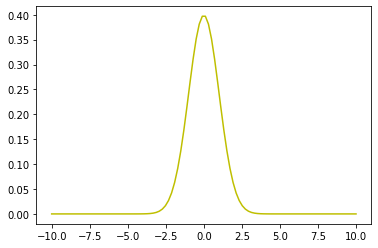

In [36]:
std_norm = norm()

x = np.linspace(-10,
                10, 100)
plt.plot(x, std_norm.pdf(x),
       'y-', label='norm pdf')

1-std_norm.cdf(0.625)

Assume that the farmer selected nine random ears. (Assume that the overall number of ears is very large, so we may think about selection process as sampling with replacement.) Find standard deviation of their mean weight considered as a random variable. This value is also known as standard error of mean. Enter ordinary fraction.

$\sigma_{\bar{x}} = \frac{\sigma}{\sqrt{n}} = \frac{8}{\sqrt{9}} = \frac{8}{3}$

The weights of selected ears are 182, 184, 166, 160, 190, 175, 174, 183 and 170 grams. (Farmer's weighting machine has precision 1 gram and gives integer results.) Sample average is 176. Farmer asks, what is the probability to obtain sample average as large as 176 if he repeat this experiment? Enter numeric value with 3 digits after the decimal point.

In [39]:
rv_s = norm(loc=175, scale=8/3)

1-rv_s.cdf(176)

0.35383023332727626

Find z-score that corresponds to the previous problem.

In [40]:
z = (176-175)/8 * 3
z

0.375

Let us assume that we don't know standard deviation of corn's ear and try to estimate it from the sample. Enter sample standard deviation for the discussed sample. (Recall that sample standard deviation is a square root of unbiased sample variance.) Enter numeric value with 2 digits after decimal point.

In [49]:
a = [182, 184, 166, 160, 190, 175, 174, 183, 170]

np.std(a, ddof=1)

9.630680142129112

F​ind t-score (also known as t-statistics or t-value) for given sample. Enter numeric value with two digits after the decimal point.

In [54]:
biased_v = np.std(a)
t = (176-175)/biased_v * 3
t

0.33040039419645856